# GNB Python-AI Study
Week 4 : Machine Learning Basics, Linear Regression

## Index
1. Definition of AI, ML, DL
2. Supervised Learning
3. Linear Regression

## 1. Definition of AI, ML, DL

### 1-1) Defintion of AI, ML, DL
<br>
<center>
<img alt="ai-ml-dl" src="images/week4/ai-ml-dl.png">
</center>

### 1-2) ML vs DL
<br>
<center>
    <img alt="ml-dl" src="images/week4/ml-dl.png">
</center>

### 1-3) Subfields of ML
<br>
<center>
    <img alt="subfields" src="images/week4/subfields.png" width="60%">
</center>

## 2. Supervised Learning

### 2-1) Supervised Learning
<br>
<center>
    <img alt="supervised" src="images/week4/supervised.png" width="60%">
</center>

## 3. Linear Regression

### 3-1) Load and Plot Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['x', 'y']
df = pd.read_csv('data/data_lab1.txt', sep=" ", names=col_names)

x_train = df['x'].values.reshape(-1, 1)
y_train = df['y'].values.reshape(-1, 1)

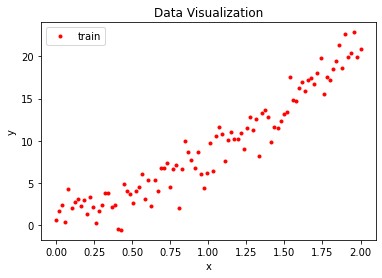

In [3]:
plt.plot(x_train, y_train, 'r.', label='train')
# plt.plot(x_test, y_test, 'b.', label='test')

plt.title('Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 3-2) Define Model

In [4]:
class LinearRegressor:
    
    def __init__(self, opt='bgd', lr=0.001):
        self.opt     = opt
        self.lr      = lr
        self.weight  = None
        self.history = []
    
    def fit(self, x, t, epochs=200, print_step=10):
        assert x.shape[0] == t.shape[0]
        assert len(x.shape) == 2
        
        self.num, self.dim = x.shape
        
        x = np.concatenate((np.ones((self.num, 1)), x), axis=1)
        self.weight = np.random.randn(self.dim+1)
        
        for epoch in range(1, epochs+1):
            y = self.forward(x)
            self.backward(x, y, t)            
            
            if epoch % print_step == 0:
                err = self.error(y, t)
                print(f'epoch: {epoch}  sse: {err}')
                self.history.append(err)
        
    
    def forward(self, x):
        y = [self.pred(xi) for xi in x]
        
        return np.array(y).reshape(-1, 1)
        
        
    def pred(self, xi):
        assert self.weight.shape == xi.shape
        
        return np.dot(self.weight, xi)
    
    
    def error(self, y, t):
        assert y.shape == t.shape
        
        return ((y - t)**2).sum() / 2
    
    
    def backward(self, x, y, t):
        
        if self.opt == 'bgd':
            for n in range(self.dim+1):
                g = 0.
                for i in range(self.num):
                    g += (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g
        
        elif self.opt == 'sgd':
            for n in range(self.dim+1):
                i = np.random.randint(self.num)
                g = (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g
        

### BGD

In [5]:
bgd = LinearRegressor(opt='bgd')

bgd.fit(x_train, y_train, epochs=200)

print('weight :', bgd.weight)

epoch: 10  sse: 568.0830448903534
epoch: 20  sse: 409.8537599385592
epoch: 30  sse: 348.43944988996077
epoch: 40  sse: 303.95860349685375
epoch: 50  sse: 271.4611914775726
epoch: 60  sse: 247.71674683735435
epoch: 70  sse: 230.3676996920531
epoch: 80  sse: 217.6914950489355
epoch: 90  sse: 208.42953600173948
epoch: 100  sse: 201.66221977364575
epoch: 110  sse: 196.71763205762832
epoch: 120  sse: 193.10483388811278
epoch: 130  sse: 190.46511721944614
epoch: 140  sse: 188.53638946774603
epoch: 150  sse: 187.12715082318448
epoch: 160  sse: 186.09748058819397
epoch: 170  sse: 185.34514471029507
epoch: 180  sse: 184.79544515218439
epoch: 190  sse: 184.3938032618216
epoch: 200  sse: 184.10034075905264
weight : [-0.70655934 10.03264369]


### SGD

In [6]:
sgd = LinearRegressor(opt='sgd')

sgd.fit(x_train, y_train, epochs=2000, print_step=100)

print('weight :', sgd.weight)

epoch: 100  sse: 3320.3843278863073
epoch: 200  sse: 2223.6481353489958
epoch: 300  sse: 1615.0788794582936
epoch: 400  sse: 1206.406024785884
epoch: 500  sse: 966.662919255668
epoch: 600  sse: 820.001676742391
epoch: 700  sse: 684.7542117421845
epoch: 800  sse: 628.6961379558146
epoch: 900  sse: 573.5616887796206
epoch: 1000  sse: 535.0141007497547
epoch: 1100  sse: 511.1555234909399
epoch: 1200  sse: 489.51350346388233
epoch: 1300  sse: 486.1217275031042
epoch: 1400  sse: 472.5786215194978
epoch: 1500  sse: 466.5899473626601
epoch: 1600  sse: 455.50816848681103
epoch: 1700  sse: 447.8558151975029
epoch: 1800  sse: 438.89598449482526
epoch: 1900  sse: 430.5426965236238
epoch: 2000  sse: 424.205574945706
weight : [3.30333779 6.6389895 ]


### Plot Learing Curve

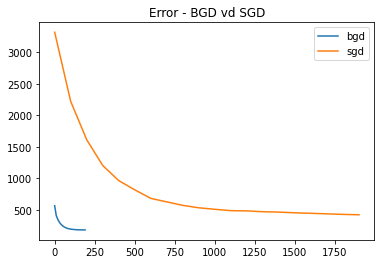

Final error
BGD : 184.10034075905264
SGD : 424.205574945706


In [7]:
plt.plot(range(0, 200, 10), bgd.history, label='bgd')
plt.plot(range(0, 2000, 100), sgd.history, label='sgd')

plt.title('Error - BGD vd SGD')
plt.legend()
plt.show()

print('Final error')
print('BGD :', bgd.history[-1])
print('SGD :', sgd.history[-1])

### Plot result

In [8]:
def plot_line(w, x, label):
    y = [w[0] + w[1] * xi for xi in x]
    plt.plot(x, y, label=label)

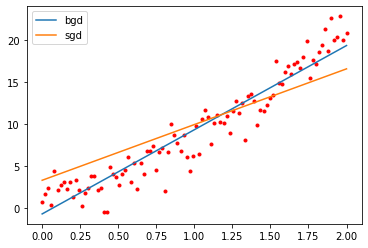

In [9]:
x = np.linspace(0, 2)

plt.plot(x_train, y_train, 'r.')
plot_line(bgd.weight, x, 'bgd')
plot_line(sgd.weight, x, 'sgd')

plt.legend()
plt.show()

# Thank you!